In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
test = pd.read_csv('./test_Insurance.csv')
train =pd.read_csv('./train_Insurance.csv')

In [3]:
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,oui


In [4]:
train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2147 non-null   object 
 1   YearOfObservation   2147 non-null   int64  
 2   Insured_Period      2147 non-null   float64
 3   Residential         2147 non-null   int64  
 4   Building_Painted    2147 non-null   object 
 5   Building_Fenced     2147 non-null   object 
 6   Garden              2144 non-null   object 
 7   Settlement          2147 non-null   object 
 8   Building Dimension  2118 non-null   float64
 9   Building_Type       2147 non-null   object 
 10  NumberOfWindows     2147 non-null   object 
 11  Geo_Code            2118 non-null   object 
 12  Claim               2147 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.2+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [7]:
#print the missing values in train 
print("\nMissing values in the training data:")
print(train.isnull().sum())


Missing values in the training data:
Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64


In [8]:
# Handling missing values
train['Building Dimension'].fillna(train['Building Dimension'].mean(), inplace=True)
train['Geo_Code'].fillna(train['Geo_Code'].mode()[0], inplace=True)
train['Garden'].fillna(train['Garden'].mode()[0], inplace=True)

In [9]:
# Verify there are no more missing values
print("Missing values in the training data after imputation:")
print(train.isnull().sum())

Missing values in the training data after imputation:
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [10]:
# Overview of the data
print("First few rows of the training data:")
print(train.head())

First few rows of the training data:
  Customer Id  YearOfObservation  Insured_Period  Residential  \
0      H13501               2012             1.0            1   
1      H14962               2012             1.0            0   
2      H17755               2013             1.0            1   
3      H13369               2016             0.5            0   
4      H12988               2012             1.0            0   

  Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                N               V      V          U              1240.0   
1                N               V      V          U               900.0   
2                V               N      O          R              4984.0   
3                N               V      V          U               600.0   
4                N               V      V          U               900.0   

     Building_Type NumberOfWindows Geo_Code Claim  
0      Wood-framed         without    75117   non  
1  Non-comb

In [11]:
print("\nSummary statistics of the training data:")
print(train.describe(include='all'))


Summary statistics of the training data:
       Customer Id  YearOfObservation  Insured_Period  Residential  \
count         5012        5012.000000     5012.000000  5012.000000   
unique        5012                NaN             NaN          NaN   
top         H13501                NaN             NaN          NaN   
freq             1                NaN             NaN          NaN   
mean           NaN        2013.660215        0.869713     0.301077   
std            NaN           1.383134        0.219496     0.458772   
min            NaN        2012.000000        0.500000     0.000000   
25%            NaN        2012.000000        0.500000     0.000000   
50%            NaN        2013.000000        1.000000     0.000000   
75%            NaN        2015.000000        1.000000     1.000000   
max            NaN        2016.000000        1.000000     1.000000   

       Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
count              5012            5

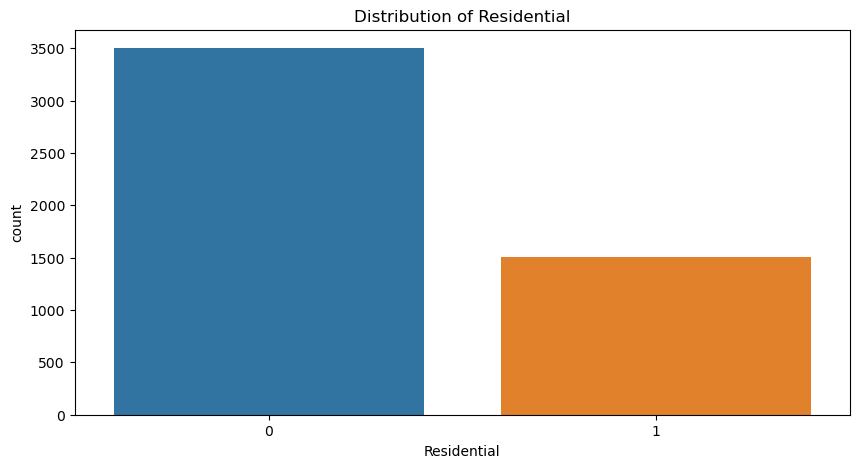

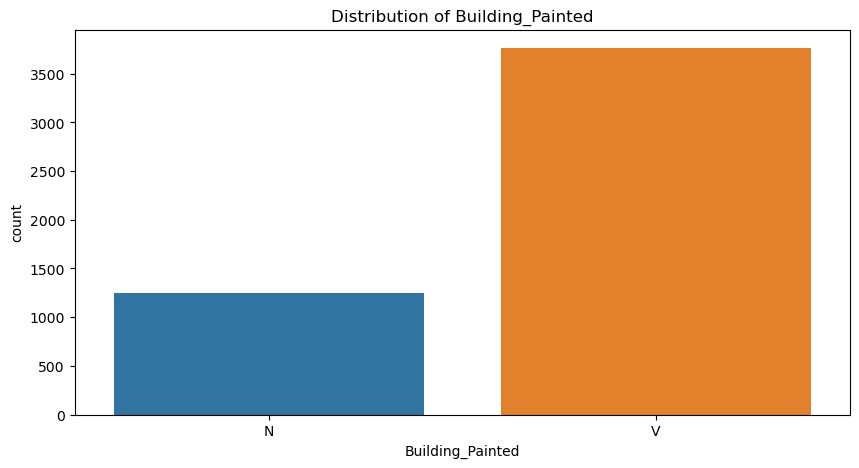

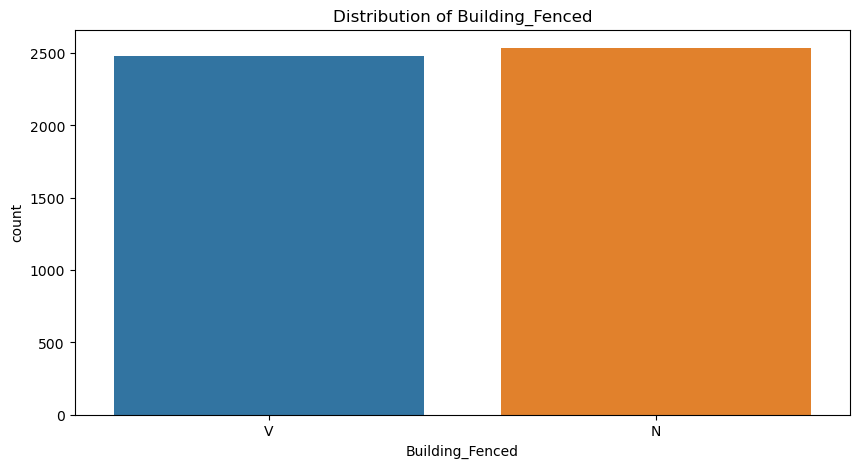

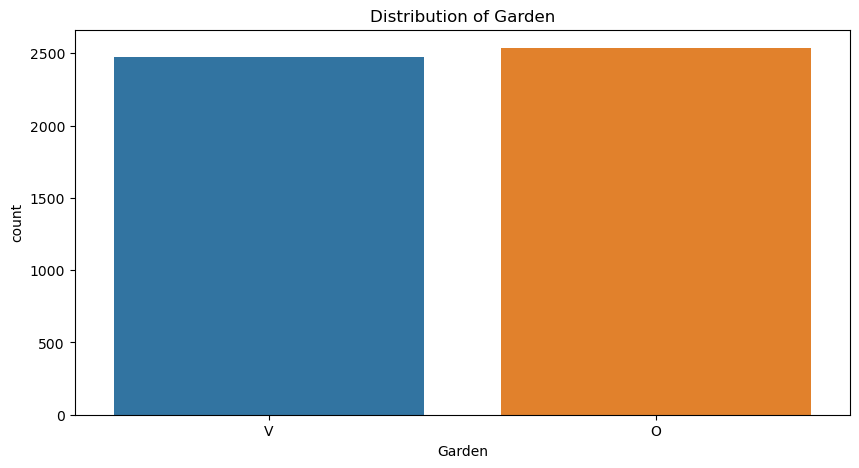

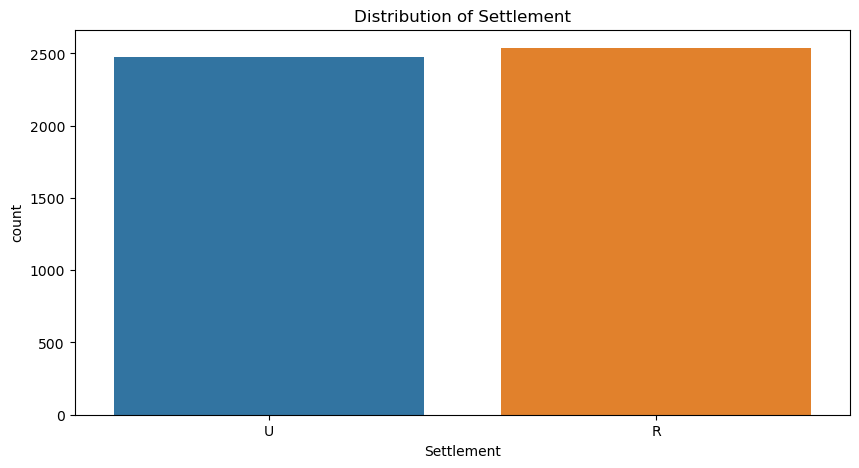

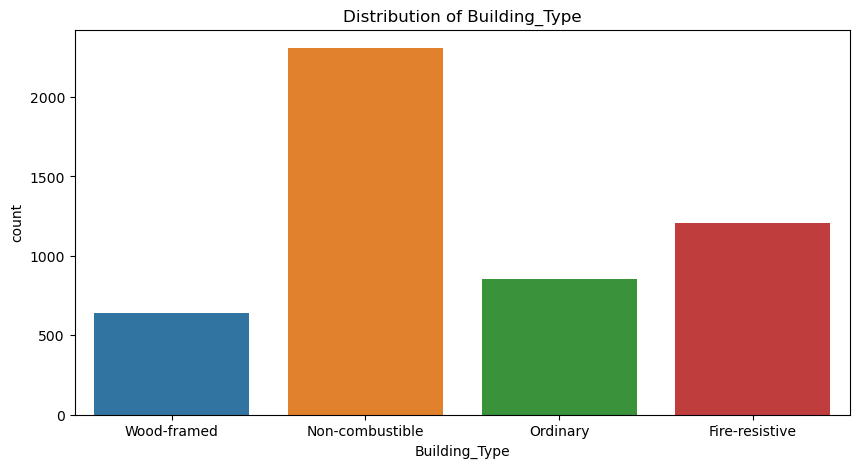

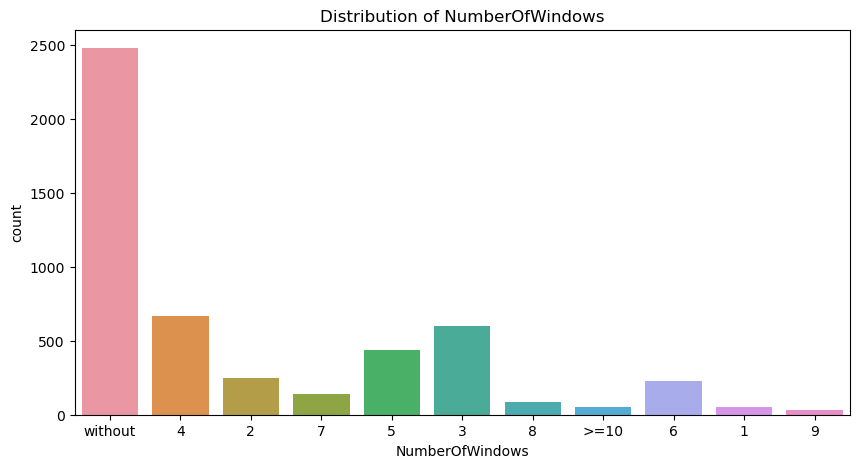

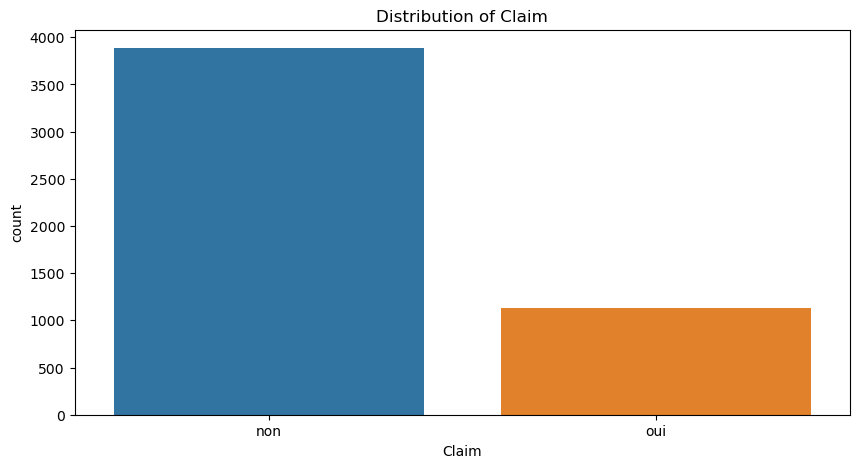

In [12]:
# Visualizing categorical features
categorical_features = ['Residential', 'Building_Painted', 'Building_Fenced', 
                        'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Claim']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()


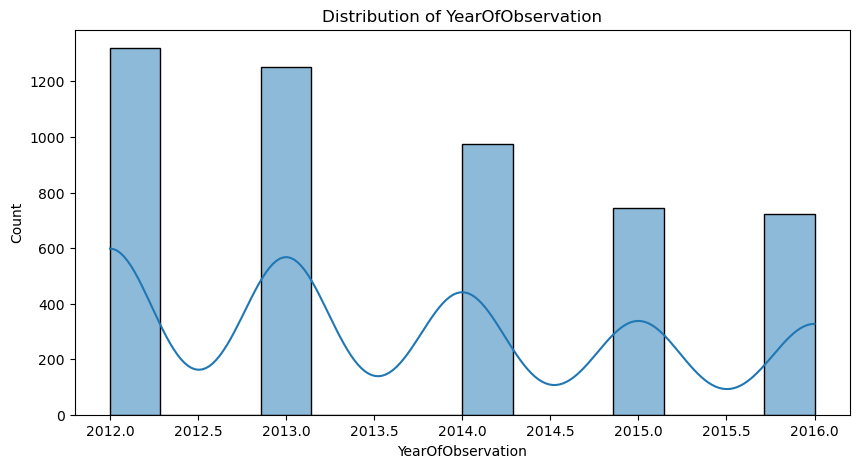

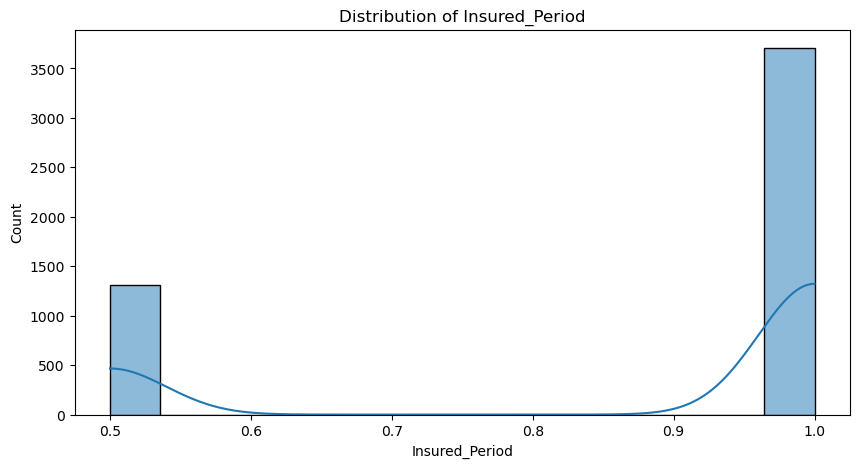

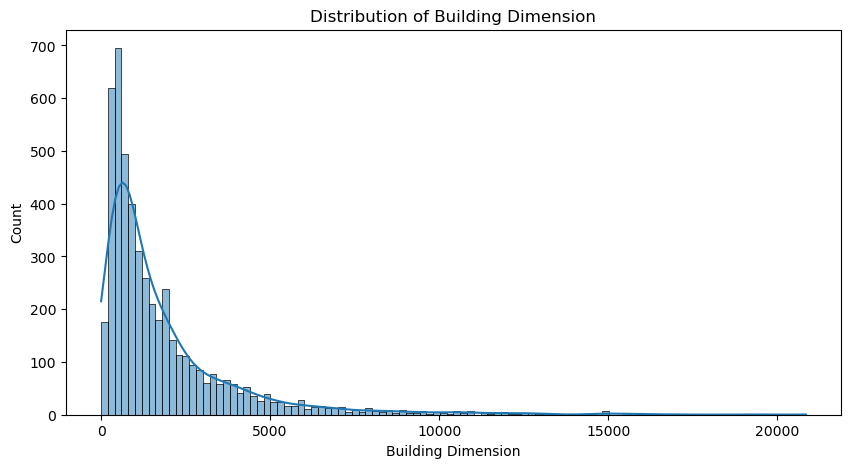

In [13]:
# Visualizing numerical features
numerical_features = ['YearOfObservation', 'Insured_Period', 'Building Dimension']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=train, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

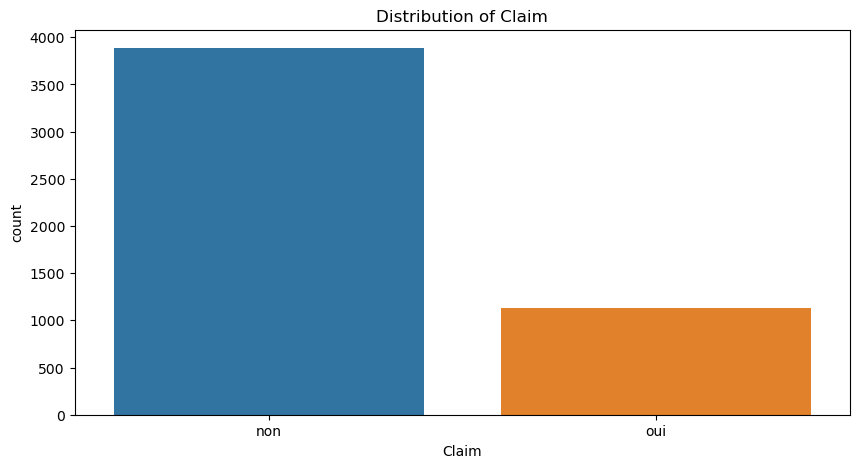

In [14]:
# Analyzing target variable
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Claim')
plt.title('Distribution of Claim')
plt.show()

In [15]:
# Handling missing values in test dataset
test['Building Dimension'].fillna(test['Building Dimension'].mean(), inplace=True)
test['Geo_Code'].fillna(test['Geo_Code'].mode()[0], inplace=True)
test['Garden'].fillna(test['Garden'].mode()[0], inplace=True)

In [16]:
# Verify there are no more missing values
print("Missing values in the test data after imputation:")
print(test.isnull().sum())

Missing values in the test data after imputation:
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [17]:
# Function to convert categorical variables to numerical
def convert_categorical_to_numerical(df):
    # Print unique values before mapping
    print("Before mapping:")
    print("Building_Painted:", df['Building_Painted'].unique())
    print("Building_Fenced:", df['Building_Fenced'].unique())
    print("Garden:", df['Garden'].unique())
    print("Settlement:", df['Settlement'].unique())
    print("Building_Type:", df['Building_Type'].unique())
    print("Claim:", df['Claim'].unique())
    print("NumberOfWindows:", df['NumberOfWindows'].unique())
    
    # Replace categorical values with numerical ones manually
    df.loc[df['Building_Painted'] == 'N', 'Building_Painted'] = 1
    df.loc[df['Building_Painted'] == 'V', 'Building_Painted'] = 0

    df.loc[df['Building_Fenced'] == 'N', 'Building_Fenced'] = 1
    df.loc[df['Building_Fenced'] == 'V', 'Building_Fenced'] = 0

    df.loc[df['Garden'] == 'V', 'Garden'] = 1
    df.loc[df['Garden'] == 'O', 'Garden'] = 0

    df.loc[df['Settlement'] == 'R', 'Settlement'] = 1
    df.loc[df['Settlement'] == 'U', 'Settlement'] = 0

    df.loc[df['Building_Type'] == 'Fire-resistive', 'Building_Type'] = 0
    df.loc[df['Building_Type'] == 'Non-combustible', 'Building_Type'] = 1
    df.loc[df['Building_Type'] == 'Ordinary', 'Building_Type'] = 2
    df.loc[df['Building_Type'] == 'Wood-framed', 'Building_Type'] = 3

    df.loc[df['Claim'] == 'oui', 'Claim'] = 1
    df.loc[df['Claim'] == 'non', 'Claim'] = 0

    df.loc[df['NumberOfWindows'] == 'without', 'NumberOfWindows'] = 0
    df['NumberOfWindows'] = pd.to_numeric(df['NumberOfWindows'], errors='coerce')
    
    # Fill missing values in NumberOfWindows with the median
    median_windows = df['NumberOfWindows'].median()
    df['NumberOfWindows'].fillna(median_windows, inplace=True)

    # Print unique values after mapping
    print("After mapping:")
    print("Building_Painted:", df['Building_Painted'].unique())
    print("Building_Fenced:", df['Building_Fenced'].unique())
    print("Garden:", df['Garden'].unique())
    print("Settlement:", df['Settlement'].unique())
    print("Building_Type:", df['Building_Type'].unique())
    print("Claim:", df['Claim'].unique())
    print("NumberOfWindows:", df['NumberOfWindows'].unique())

    return df

train_data = convert_categorical_to_numerical(train)
test_data = convert_categorical_to_numerical(test)

Before mapping:
Building_Painted: ['N' 'V']
Building_Fenced: ['V' 'N']
Garden: ['V' 'O']
Settlement: ['U' 'R']
Building_Type: ['Wood-framed' 'Non-combustible' 'Ordinary' 'Fire-resistive']
Claim: ['non' 'oui']
NumberOfWindows: ['without' '4' '2' '7' '5' '3' '8' '>=10' '6' '1' '9']
After mapping:
Building_Painted: [1 0]
Building_Fenced: [0 1]
Garden: [1 0]
Settlement: [0 1]
Building_Type: [3 1 2 0]
Claim: [0 1]
NumberOfWindows: [0. 4. 2. 7. 5. 3. 8. 1. 6. 9.]
Before mapping:
Building_Painted: ['V' 'N']
Building_Fenced: ['V' 'N']
Garden: ['V' 'O']
Settlement: ['U' 'R']
Building_Type: ['Fire-resistive' 'Ordinary' 'Non-combustible' 'Wood-framed']
Claim: ['oui' 'non']
NumberOfWindows: ['without' '5' '6' '9' '7' '3' '8' '4' '1' '2' '>=10']
After mapping:
Building_Painted: [0 1]
Building_Fenced: [0 1]
Garden: [1 0]
Settlement: [0 1]
Building_Type: [0 2 1 3]
Claim: [1 0]
NumberOfWindows: [0. 5. 6. 9. 7. 3. 8. 4. 1. 2.]


In [18]:
# Display the first few rows of the train data
print(train_data.head())

  Customer Id  YearOfObservation  Insured_Period  Residential  \
0      H13501               2012             1.0            1   
1      H14962               2012             1.0            0   
2      H17755               2013             1.0            1   
3      H13369               2016             0.5            0   
4      H12988               2012             1.0            0   

  Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                1               0      1          0              1240.0   
1                1               0      1          0               900.0   
2                0               1      0          1              4984.0   
3                1               0      1          0               600.0   
4                1               0      1          0               900.0   

  Building_Type  NumberOfWindows Geo_Code Claim  
0             3              0.0    75117     0  
1             1              0.0    62916     0  
2 

In [19]:
# Verify there are no more missing values
print("Missing values in the training data:")
print(train_data.isnull().sum())

Missing values in the training data:
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


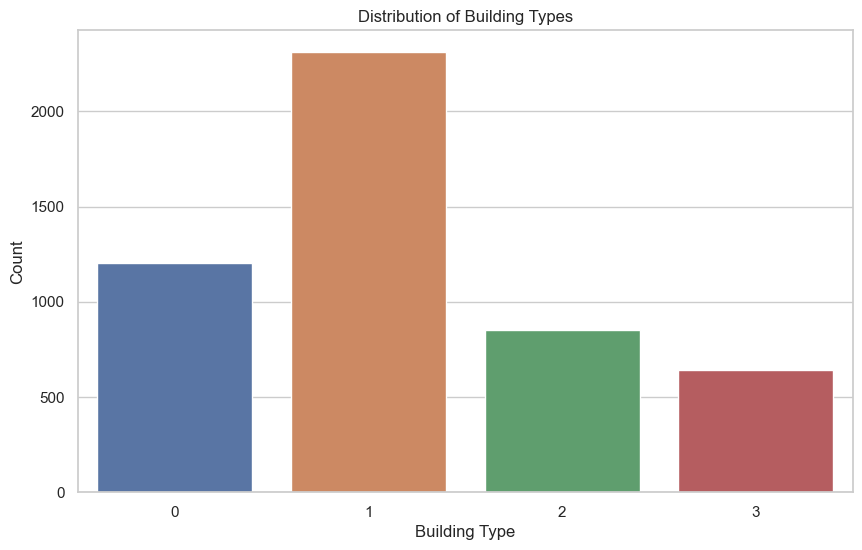

In [20]:
# Set up the visual style
sns.set(style="whitegrid")

# Distribution of Building Types
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Building_Type')
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.show()

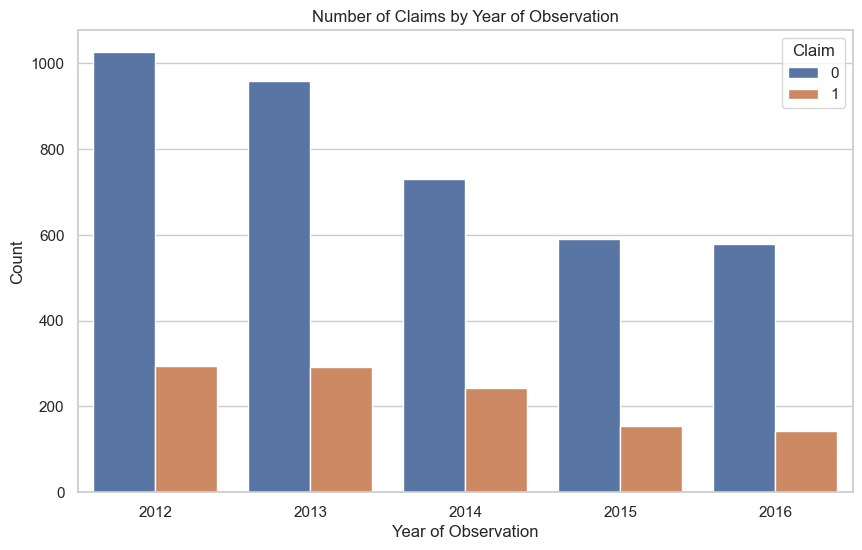

In [21]:
# Number of Claims by Year of Observation
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='YearOfObservation', hue='Claim')
plt.title('Number of Claims by Year of Observation')
plt.xlabel('Year of Observation')
plt.ylabel('Count')
plt.legend(title='Claim')
plt.show()

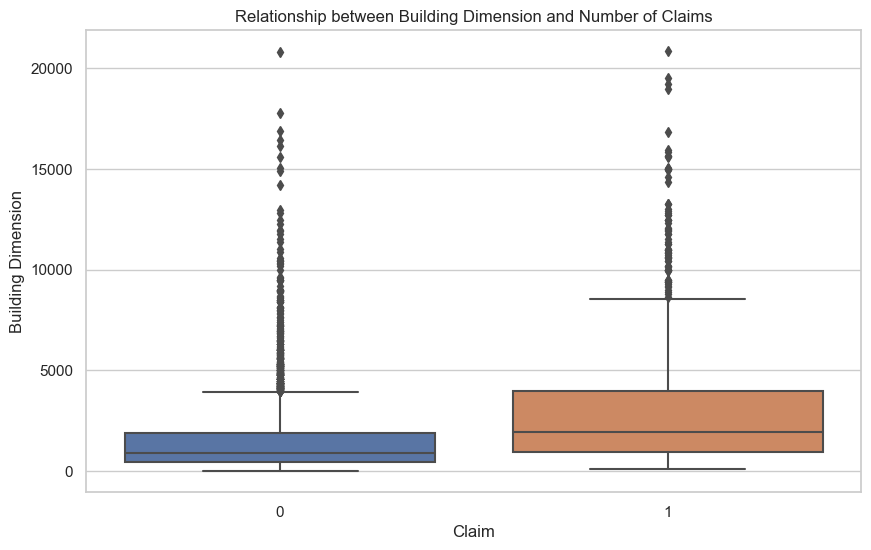

In [22]:
# Relationship between Building Dimension and Number of Claims
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Claim', y='Building Dimension')
plt.title('Relationship between Building Dimension and Number of Claims')
plt.xlabel('Claim')
plt.ylabel('Building Dimension')
plt.show()

In [23]:
# Drop the Customer Id column
train_data.drop(['Customer Id'], axis=1, inplace=True)
test_data.drop(['Customer Id'], axis=1, inplace=True)

# Drop the Customer Id column
train_data.drop(['Geo_Code'], axis=1, inplace=True)
test_data.drop(['Geo_Code'], axis=1, inplace=True)

In [24]:
# Select numeric columns
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

# If you want to apply the same transformation to the test data
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])


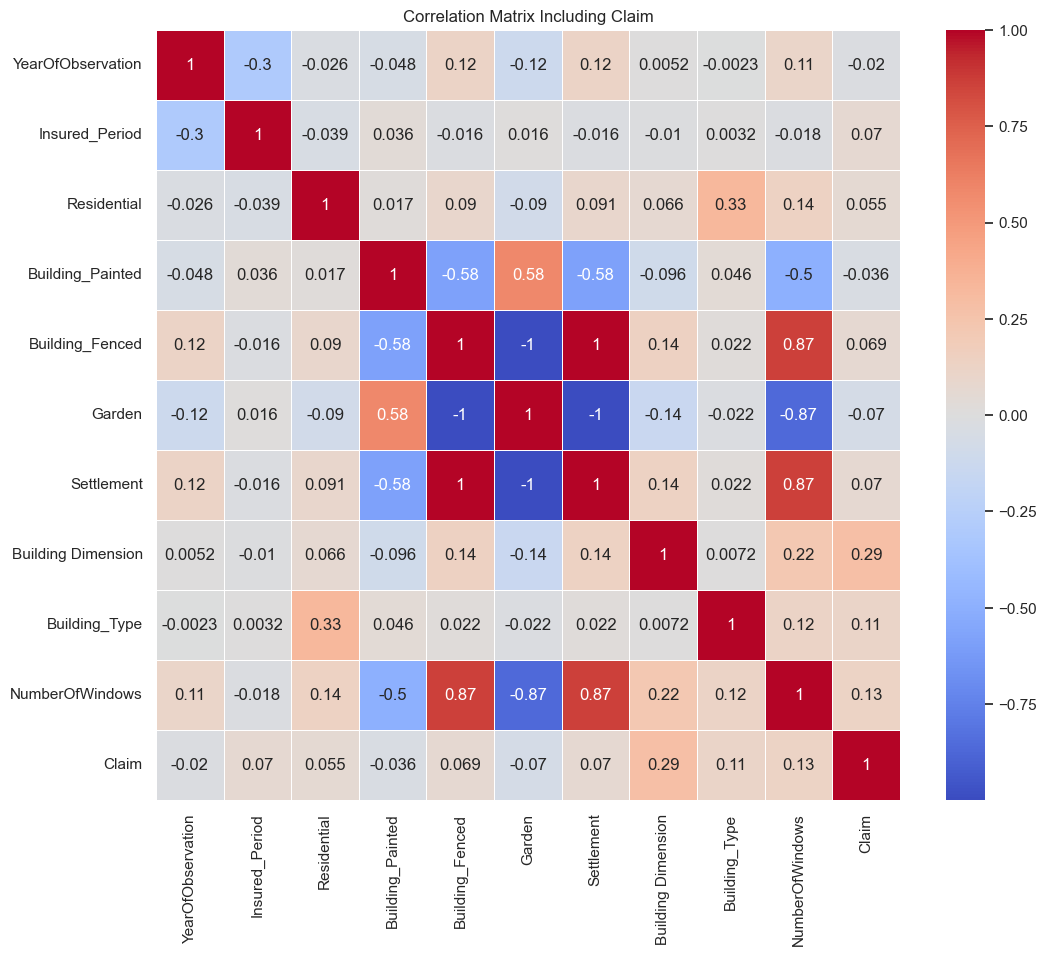

In [25]:
# Correlation Matrix

plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Claim')
plt.show()

In [26]:
# Ensure the target variable is binary
print("Unique values in the target variable (Claim):", train_data['Claim'].unique())

Unique values in the target variable (Claim): [0 1]


In [27]:
# Check for any non-binary values in the target variable
if not set(train_data['Claim'].unique()).issubset({0, 1}):
    print("Error: The target variable contains non-binary values.")
else:
    # Splitting the data
    X = train_data.drop('Claim', axis=1)
    y = train_data['Claim'].astype(int)  # Ensure the target variable is of integer type

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    

In [28]:
# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    
    return accuracy, precision, recall, f1, cm

In [29]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [30]:
# Train and evaluate models
models = {'Logistic Regression': log_reg, 
          'Decision Tree': decision_tree, 
          'Random Forest': random_forest, 
          'Gradient Boosting': gradient_boosting}

results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }


In [31]:
for model_name, model in models.items():
        accuracy, precision, recall, f1, cm = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        }

In [32]:
# Display the results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    



Model: Logistic Regression
Accuracy: 0.7916
Precision: 0.6415
Recall: 0.1518
F1 Score: 0.2455
Confusion Matrix:
[[760  19]
 [190  34]]

Model: Decision Tree
Accuracy: 0.7228
Precision: 0.3750
Recall: 0.3616
F1 Score: 0.3682
Confusion Matrix:
[[644 135]
 [143  81]]

Model: Random Forest
Accuracy: 0.7418
Precision: 0.3977
Recall: 0.3036
F1 Score: 0.3443
Confusion Matrix:
[[676 103]
 [156  68]]

Model: Gradient Boosting
Accuracy: 0.7916
Precision: 0.6119
Recall: 0.1830
F1 Score: 0.2818
Confusion Matrix:
[[753  26]
 [183  41]]


In [33]:
# Provided results dictionary
results = {
    'Logistic Regression': {
        'Accuracy': 0.7916,
        'Precision': 0.6415,
        'Recall': 0.1518,
        'F1 Score': 0.2455,
        'Confusion Matrix': [[760, 19], [190, 34]]
    },
    'Decision Tree': {
        'Accuracy': 0.7228,
        'Precision': 0.3750,
        'Recall': 0.3616,
        'F1 Score': 0.3682,
        'Confusion Matrix': [[644, 135], [143, 81]]
    },
    'Random Forest': {
        'Accuracy': 0.7418,
        'Precision': 0.3977,
        'Recall': 0.3036,
        'F1 Score': 0.3443,
        'Confusion Matrix': [[676, 103], [156, 68]]
    },
    'Gradient Boosting': {
        'Accuracy': 0.7916,
        'Precision': 0.6119,
        'Recall': 0.1830,
        'F1 Score': 0.2818,
        'Confusion Matrix': [[753, 26], [183, 41]]
    }
}


In [34]:
# Create a DataFrame for metrics
metrics_list = []

# Populate the list
for model_name, metrics in results.items():
    metrics_list.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score']
    })

metrics_df = pd.DataFrame(metrics_list)

# Create a DataFrame for confusion matrices
confusion_matrices_list = []

# Populate the list
for model_name, metrics in results.items():
    confusion_matrices_list.append({
        'Model': model_name,
        'Confusion Matrix': metrics['Confusion Matrix']
    })

confusion_matrices_df = pd.DataFrame(confusion_matrices_list)

In [35]:
# Display the DataFrames
print("Metrics Table:")
print(metrics_df)

print("\nConfusion Matrices Table:")
print(confusion_matrices_df)


Metrics Table:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7916     0.6415  0.1518    0.2455
1        Decision Tree    0.7228     0.3750  0.3616    0.3682
2        Random Forest    0.7418     0.3977  0.3036    0.3443
3    Gradient Boosting    0.7916     0.6119  0.1830    0.2818

Confusion Matrices Table:
                 Model         Confusion Matrix
0  Logistic Regression   [[760, 19], [190, 34]]
1        Decision Tree  [[644, 135], [143, 81]]
2        Random Forest  [[676, 103], [156, 68]]
3    Gradient Boosting   [[753, 26], [183, 41]]


In [36]:
# Selecting the best-performing model based on F1 Score
best_model = log_reg

In [37]:
# Train the best model on the entire training data
best_model.fit(X, y)

LogisticRegression(random_state=42)

In [38]:
# Make predictions on the test data
test_predictions = best_model.predict(test_data.drop('Claim', axis=1))

In [39]:
# Add the predictions to the test data for viewing
test_data['Predicted_Claim'] = test_predictions

In [40]:
# Map numerical predictions back to categorical
test_data['Predicted_Claim'] = test_data['Predicted_Claim'].map({1: 'oui', 0: 'non'})

In [41]:
# Display the first few rows with predictions
print(test_data[['Claim', 'Predicted_Claim']])

     Claim Predicted_Claim
0        1             non
1        0             non
2        1             non
3        1             non
4        0             non
...    ...             ...
2142     0             non
2143     0             non
2144     0             non
2145     1             non
2146     0             non

[2147 rows x 2 columns]
